In [1]:
import numpy as np
import matplotlib.pyplot as plt

import ipywidgets as widgets

from IPython.display import display

In [2]:
NUM_STATES = 8
NUM_OBSERVATIONS = 3
NUM_BELIEFS = 2 # TARGET vs. NON TARGET
ANGLE_RANGE = 2*np.pi

STATE_STEP = ANGLE_RANGE/NUM_STATES
STATE_CENTERS = (np.arange(-STATE_STEP, ANGLE_RANGE, STATE_STEP) + STATE_STEP) % ANGLE_RANGE
ANGL_DIST_BETWEEN_STATES = (STATE_CENTERS[np.newaxis, :] - STATE_CENTERS[:, np.newaxis])

PRIOR_TARGET_PROB = np.array([1/NUM_BELIEFS, 1-(1/NUM_BELIEFS)])
PRIOR_STATE_PROB = np.full(NUM_STATES, 1/NUM_STATES)

prob_code0_in_states = np.array([0.5, 0.5, 0.0, 0.5, 0.5, 0.5, 0.0, 0.5])
prob_code1_in_states = np.array([0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0])
prob_code2_in_states = np.array([0.5, 0.5, 0.0, 0.5, 0.5, 0.5, 1.0, 0.5])

EMISSION_MATRIX_NONTARGET = np.vstack([prob_code0_in_states, prob_code1_in_states, prob_code2_in_states])
EMISSION_MATRIX_NONTARGET

array([[0.5, 0.5, 0. , 0.5, 0.5, 0.5, 0. , 0.5],
       [0. , 0. , 1. , 0. , 0. , 0. , 0. , 0. ],
       [0.5, 0.5, 0. , 0.5, 0.5, 0.5, 1. , 0.5]])

In [3]:
obs1_bounds1 = np.array([60, 120])
obs1_bounds2 = np.array([240, 300])

In [4]:
def observe_angle_state_pair(initial_angle):
   plt.figure(figsize=(6, 6))
   radius = 1
   radius_until = 5
   pie = np.pi
   theta_obs1 = np.linspace(np.radians(obs1_bounds1[0]), np.radians(obs1_bounds1[1]), 30)
   x_inner = radius * np.cos(theta_obs1)
   y_inner =  radius * np.sin(theta_obs1)
   x_poly = np.concatenate([radius_until*x_inner, x_inner[::-1]])
   y_poly = np.concatenate([radius_until*y_inner, y_inner[::-1]])
   plt.fill(x_poly, y_poly, facecolor='blue', alpha=0.25, linewidth=0)
   plt.plot(x_inner, y_inner, color='blue', linewidth=1)

   theta_obs1 = np.linspace(np.radians(obs1_bounds2[0]), np.radians(obs1_bounds2[1]), 30)
   x_inner = radius * np.cos(theta_obs1)
   y_inner =  radius * np.sin(theta_obs1)
   x_poly = np.concatenate([radius_until*x_inner, x_inner[::-1]])
   y_poly = np.concatenate([radius_until*y_inner, y_inner[::-1]])
   plt.fill(x_poly, y_poly, facecolor='purple', alpha=0.25, linewidth=0)
   plt.plot(x_inner, y_inner, color='purple', linewidth=1)

   theta_obs0 = np.linspace(np.radians(obs1_bounds1[1]), np.radians(obs1_bounds2[0]), 30)
   x_inner = radius * np.cos(theta_obs0)
   y_inner =  radius * np.sin(theta_obs0)
   x_poly = np.concatenate([radius_until*x_inner, x_inner[::-1]])
   y_poly = np.concatenate([radius_until*y_inner, y_inner[::-1]])
   plt.fill(x_poly, y_poly, facecolor='orange', alpha=0.25, linewidth=0)
   plt.plot(x_inner, y_inner, color='orange', linewidth=1)

   theta_obs0 = np.linspace(np.radians(obs1_bounds2[1]), np.radians(obs1_bounds1[0])+2*pie, 30)
   x_inner = radius * np.cos(theta_obs0)
   y_inner =  radius * np.sin(theta_obs0)
   x_poly = np.concatenate([radius_until*x_inner, x_inner[::-1]])
   y_poly = np.concatenate([radius_until*y_inner, y_inner[::-1]])
   plt.fill(x_poly, y_poly, facecolor='orange', alpha=0.25, linewidth=0)
   plt.plot(x_inner, y_inner, color='orange', linewidth=1)

   for theta in STATE_CENTERS:
      r_outer = 4 * radius_until * radius
      plt.plot([radius*np.cos(theta), r_outer*np.cos(theta)], 
               [radius*np.sin(theta), r_outer*np.sin(theta)],
                  color='k', linewidth=1.5, solid_capstyle='round', zorder=1)
      
   if initial_angle > obs1_bounds1[0] and initial_angle < obs1_bounds1[1]:
      code_received = 1
   elif initial_angle > obs1_bounds2[0] and initial_angle < obs1_bounds2[1]:
      code_received = 2
   else:
      code_received = 0
   initial_radians = np.radians((initial_angle % 360))
   initial_state = np.floor((initial_radians + (STATE_STEP/2)) / STATE_STEP) % NUM_STATES
   plt.scatter(radius_until*radius*np.cos(STATE_CENTERS[int(initial_state)]), radius_until*radius*np.sin(STATE_CENTERS[int(initial_state)]),
            s=200, marker='.', facecolor='r', edgecolor='k', zorder=4, label=f'State={initial_state}\nCode={code_received}')

   plt.gca().set_aspect('equal', adjustable='box')
   plt.xticks([])
   plt.yticks([])
   GRID_EXTENT = 7
   plt.xlim(-GRID_EXTENT, GRID_EXTENT)
   plt.ylim(-GRID_EXTENT, GRID_EXTENT)
   plt.legend()
   plt.show()


In [5]:
initial_angle_slider = widgets.IntSlider(
    value=0,  
    min=0,
    max=360,
    description="Initial Angle",
    style={'description_width': 'initial'},
    continuous_update=True,
    layout=widgets.Layout(width="600px"),
)

interactive_plot = widgets.interactive(
    observe_angle_state_pair, initial_angle=initial_angle_slider)
display(interactive_plot)

interactive(children=(IntSlider(value=0, description='Initial Angle', layout=Layout(width='600px'), max=360, s…

In [6]:
STATE_STEP, PRIOR_STATE_PROB

(0.7853981633974483,
 array([0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125]))

In [7]:
def get_stochastic_state_transition_matrix(candidate_step):
    if candidate_step>0:
        mod_basis = 2*np.pi
    else:
        mod_basis = -2*np.pi

    angular_dist_between_states_in_extent = ANGL_DIST_BETWEEN_STATES % mod_basis
    angular_dist_after_action = (angular_dist_between_states_in_extent - candidate_step)
    angular_dist_after_action_in_extent = angular_dist_after_action % mod_basis
    
    sigma = STATE_STEP/2
    magnitude = 1 / np.sqrt((2*np.pi) * (sigma**2))
    state_transition = magnitude * np.exp(-0.5*((angular_dist_after_action_in_extent/sigma)**2))
    state_transition_normed = state_transition / state_transition.sum(axis=1)
    return state_transition_normed

def get_deterministic_state_transition_matrix(candidate_step):
    if candidate_step!=0:
        shift = int(candidate_step / STATE_STEP)
    else:
        shift = 0

    state_matrix = np.eye(NUM_STATES)
    state_transition_matrix = np.roll(state_matrix, shift, axis=1)
    
    return state_transition_matrix

In [8]:
candidate_step = -STATE_STEP
state_transition_matrix = get_deterministic_state_transition_matrix(candidate_step)
state_transition_matrix.round(3)

array([[0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0.]])

In [9]:
candidate_step = 0
state_transition_matrix = get_deterministic_state_transition_matrix(candidate_step)
state_transition_matrix.round(3)

array([[1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1.]])

In [10]:
candidate_step = STATE_STEP
state_transition_matrix = get_deterministic_state_transition_matrix(candidate_step)
state_transition_matrix.round(3)

array([[0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0.]])

In [11]:
obs1_bounds1 = np.array([60, 120])
obs1_bounds2 = np.array([150, 210])

In [12]:
initial_angle_slider = widgets.IntSlider(
    value=0,  
    min=0,
    max=360,
    description="Initial Angle",
    style={'description_width': 'initial'},
    continuous_update=True,
    layout=widgets.Layout(width="600px"),
)

interactive_plot = widgets.interactive(
    observe_angle_state_pair, initial_angle=initial_angle_slider)
display(interactive_plot)

interactive(children=(IntSlider(value=0, description='Initial Angle', layout=Layout(width='600px'), max=360, s…

In [13]:
NUM_STATES

8

In [14]:
prob_code1_in_states = np.array([0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0])
prob_code2_in_states = np.array([0.5, 0.5, 0.0, 0.5, 1.0, 0.5, 0.5, 0.5])
prob_code0_in_states = 1-(prob_code1_in_states+prob_code2_in_states)

EMISSION_MATRIX_B = np.vstack([prob_code0_in_states, prob_code1_in_states, prob_code2_in_states])
EMISSION_MATRIX_B

array([[0.5, 0.5, 0. , 0.5, 0. , 0.5, 0.5, 0.5],
       [0. , 0. , 1. , 0. , 0. , 0. , 0. , 0. ],
       [0.5, 0.5, 0. , 0.5, 1. , 0.5, 0.5, 0.5]])

In [15]:
trial_num = 0
num_trials = 10
max_iter = 50
posterior_across_trials = np.zeros((num_trials, max_iter+1, NUM_BELIEFS))
expected_forecast_t_across_trials = np.zeros((num_trials, max_iter, 3))
angles_visited_across_trials = np.zeros((num_trials, max_iter))
steps_taken_across_trials = np.zeros((num_trials, max_iter))
entropy_across_trials = np.zeros((num_trials, max_iter))
time_taken_per_trial = np.zeros(num_trials)
codes_received_across_trials = np.zeros((num_trials, max_iter))

while trial_num < num_trials:  
    joint_prob_obs_state_t_from_target = np.zeros((max_iter, EMISSION_MATRIX_B.shape[0], EMISSION_MATRIX_B.shape[1]))
    joint_prob_received_obs_state_t_from_target = np.zeros((max_iter, EMISSION_MATRIX_B.shape[1]))
    joint_prob_obs_state_t_from_NONtarget = np.zeros((max_iter, EMISSION_MATRIX_NONTARGET.shape[0], EMISSION_MATRIX_NONTARGET.shape[1]))
    joint_prob_received_obs_state_t_from_NONtarget = np.zeros((max_iter, EMISSION_MATRIX_NONTARGET.shape[1]))
    joint_prob_obs_state_forecast_t_fromtarget = np.zeros((max_iter, EMISSION_MATRIX_B.shape[0], EMISSION_MATRIX_B.shape[1]))
    joint_prob_obs_state_forecast_t_fromNONtarget = np.zeros((max_iter, EMISSION_MATRIX_NONTARGET.shape[0], EMISSION_MATRIX_NONTARGET.shape[1]))
    likelihood_received_obs_from_target_t = np.zeros(max_iter)
    likelihood_received_obs_from_NONtarget_t = np.zeros(max_iter)
    angles_visited = np.zeros(max_iter)
    steps_taken = np.zeros(max_iter)
    posterior_t = np.zeros((max_iter, NUM_BELIEFS))
    current_entropyS_t = np.zeros(max_iter)
    candidate_steps = np.array([-STATE_STEP, 0, STATE_STEP])
    expected_forecast_t_S_per_step = np.zeros((max_iter, candidate_steps.shape[0]))
    deltaS_t = np.zeros((max_iter, candidate_steps.shape[0]))
    code_received_t = np.zeros(max_iter)

    time_ind = 0
    initial_angle = 0
    stopping_num = 0

    while time_ind<max_iter and stopping_num < 2:
        if np.isclose(posterior_t[time_ind-1], 1).any() or stopping_num>0:
            stopping_num+=1

        if time_ind<1:
            angles_visited[time_ind] = initial_angle
        else:
            angles_visited[time_ind] = angles_visited[time_ind-1] + np.rad2deg(step_to_take)

        angle_visited_radians = np.radians((angles_visited[time_ind] % 360))
        state_visited = np.floor((angle_visited_radians) / STATE_STEP)
        code_received_t[time_ind] = np.random.choice(np.arange(NUM_OBSERVATIONS), p=EMISSION_MATRIX_B[:,int(state_visited)])
        print(f'Current angle: {angles_visited[time_ind]}, Code received: {code_received_t[time_ind]}')

        if time_ind<1:
            joint_prob_obs_state_t_from_target[time_ind] = PRIOR_STATE_PROB * EMISSION_MATRIX_B
            joint_prob_obs_state_t_from_NONtarget[time_ind] = PRIOR_STATE_PROB * EMISSION_MATRIX_NONTARGET
        else:
            state_transition_matrix = get_deterministic_state_transition_matrix(step_to_take)
            joint_prob_obs_state_t_from_target[time_ind] = (joint_prob_received_obs_state_t_from_target[time_ind-1] @ state_transition_matrix) * EMISSION_MATRIX_B
            joint_prob_obs_state_t_from_NONtarget[time_ind] = (joint_prob_received_obs_state_t_from_NONtarget[time_ind-1] @ state_transition_matrix) * EMISSION_MATRIX_NONTARGET

        joint_prob_received_obs_state_t_from_target[time_ind] = joint_prob_obs_state_t_from_target[time_ind][int(code_received_t[time_ind])]
        likelihood_received_obs_from_target_t[time_ind] = joint_prob_received_obs_state_t_from_target[time_ind].sum()

        joint_prob_received_obs_state_t_from_NONtarget[time_ind] = joint_prob_obs_state_t_from_NONtarget[time_ind][int(code_received_t[time_ind])]
        likelihood_received_obs_from_NONtarget_t[time_ind] = joint_prob_received_obs_state_t_from_NONtarget[time_ind].sum()

        if time_ind<1:
            likelihood_received_obs = np.array([likelihood_received_obs_from_target_t[time_ind], likelihood_received_obs_from_NONtarget_t[time_ind]])
            posterior_t[time_ind] = (PRIOR_TARGET_PROB*likelihood_received_obs) / (PRIOR_TARGET_PROB*likelihood_received_obs).sum()
        else:
            likelihood_received_obs_from_target_given_obs_sequence = likelihood_received_obs_from_target_t[time_ind] / likelihood_received_obs_from_target_t[time_ind-1]
            likelihood_received_obs_from_NONtarget_given_obs_sequence = likelihood_received_obs_from_NONtarget_t[time_ind] / likelihood_received_obs_from_NONtarget_t[time_ind-1]
            likelihood_received_obs = np.array([likelihood_received_obs_from_target_given_obs_sequence, likelihood_received_obs_from_NONtarget_given_obs_sequence])
            posterior_t[time_ind] = (posterior_t[time_ind-1]*likelihood_received_obs) / (posterior_t[time_ind-1]*likelihood_received_obs).sum()

        if 1 in posterior_t[time_ind]:
            current_entropyS_t[time_ind] = 0
        else:
            current_entropyS_t[time_ind] = (-posterior_t[time_ind]*np.log2(posterior_t[time_ind])).sum()

        if int(time_ind+1)>1:
            print(f"P(O1:{int(time_ind+1)},S{int(time_ind+1)}|Δθ2:{int(time_ind+1)},T)={joint_prob_received_obs_state_t_from_target[time_ind].round(4)}, P(O1:{int(time_ind+1)}|Δθ2:{int(time_ind+1)},T)={likelihood_received_obs_from_target_t[time_ind]}, P(S{int(time_ind+1)}|O1:{int(time_ind+1)},Δθ2:{int(time_ind+1)},T)={(joint_prob_received_obs_state_t_from_target[time_ind]/likelihood_received_obs_from_target_t[time_ind]).round(2)}, P(T|O1:{int(time_ind+1)},Δθ2:{int(time_ind+1)})={posterior_t[time_ind]}, H{int(time_ind+1)}={current_entropyS_t[time_ind]:.2f}")
        else:
            print(f"P(O1:{int(time_ind+1)},S{int(time_ind+1)}|Δθ2:{int(time_ind+1)},T)={joint_prob_received_obs_state_t_from_target[time_ind].round(4)}, P(O1:{int(time_ind+1)}|Δθ2:{int(time_ind+1)},T)={likelihood_received_obs_from_target_t[time_ind]}, P(S{int(time_ind+1)}|O1:{int(time_ind+1)},Δθ2:{int(time_ind+1)},T)={(joint_prob_received_obs_state_t_from_target[time_ind]/likelihood_received_obs_from_target_t[time_ind]).round(2)}, P(T|O1:{int(time_ind+1)},Δθ2:{int(time_ind+1)})={posterior_t[time_ind]}, H{int(time_ind+1)}={current_entropyS_t[time_ind]:.2f}")

        if int(time_ind+1)>1:
            print(f"P(O1:{int(time_ind+1)},S{int(time_ind+1)}|Δθ2:{int(time_ind+1)},~T)={joint_prob_received_obs_state_t_from_NONtarget[time_ind].round(4)}, P(O1:{int(time_ind+1)}|Δθ2:{int(time_ind+1)},~T)={likelihood_received_obs_from_NONtarget_t[time_ind]}, P(S{int(time_ind+1)}|O1:{int(time_ind+1)},Δθ2:{int(time_ind+1)},~T)={(joint_prob_received_obs_state_t_from_NONtarget[time_ind]/likelihood_received_obs_from_NONtarget_t[time_ind]).round(2)}")
        else:
            print(f"P(O1:{int(time_ind+1)},S{int(time_ind+1)}|Δθ2:{int(time_ind+1)},~T)={joint_prob_received_obs_state_t_from_NONtarget[time_ind].round(4)}, P(O1:{int(time_ind+1)}|Δθ2:{int(time_ind+1)},~T)={likelihood_received_obs_from_NONtarget_t[time_ind]}, P(S{int(time_ind+1)}|O1:{int(time_ind+1)},Δθ2:{int(time_ind+1)},~T)={(joint_prob_received_obs_state_t_from_NONtarget[time_ind]/likelihood_received_obs_from_NONtarget_t[time_ind]).round(2)}")

        print(f'P(O{int(time_ind+1)}|O1:{int(time_ind)},Δθ2:{int(time_ind)})={likelihood_received_obs}')
        for i, forecast_t_candidate_step in enumerate(candidate_steps):
            state_transition_matrix = (get_deterministic_state_transition_matrix(forecast_t_candidate_step))

            joint_prob_obs_state_forecast_t_fromtarget[time_ind] = (joint_prob_received_obs_state_t_from_target[time_ind] @ state_transition_matrix) * EMISSION_MATRIX_B
            likelihood_obs_from_target_forecast_t_fromtarget = joint_prob_obs_state_forecast_t_fromtarget[time_ind].sum(axis=1)
            if likelihood_received_obs_from_target_t[time_ind]>0:
                likelihood_obs_from_target_forecast_t_given_received_obs_fromtarget = likelihood_obs_from_target_forecast_t_fromtarget / likelihood_received_obs_from_target_t[time_ind]
            else:
                likelihood_obs_from_target_forecast_t_given_received_obs_fromtarget = np.zeros(NUM_OBSERVATIONS)
            print(f'If Δθ{int(time_ind+2)}={forecast_t_candidate_step:.2f}, P(O1:{int(time_ind+2)},S{int(time_ind+1)}|Δθ2:{int(time_ind+2)},T)=\n[{joint_prob_obs_state_forecast_t_fromtarget[time_ind][0].round(2)},\n{joint_prob_obs_state_forecast_t_fromtarget[time_ind][1].round(2)},\n{joint_prob_obs_state_forecast_t_fromtarget[time_ind][2].round(2)}]')
            print(f'P(O1:{int(time_ind+2)}|Δθ2:{int(time_ind+2)},T)={likelihood_obs_from_target_forecast_t_fromtarget}')
            print(f'P(O{int(time_ind+2)}|O1:{int(time_ind+1)},Δθ2:{int(time_ind+2)},T)={likelihood_obs_from_target_forecast_t_given_received_obs_fromtarget}')

            joint_prob_obs_state_forecast_t_fromNONtarget[time_ind] = (joint_prob_received_obs_state_t_from_NONtarget[time_ind] @ state_transition_matrix) * EMISSION_MATRIX_NONTARGET
            likelihood_obs_from_target_forecast_t_fromNONtarget = joint_prob_obs_state_forecast_t_fromNONtarget[time_ind].sum(axis=1)
            if likelihood_received_obs_from_NONtarget_t[time_ind]>0:
                likelihood_obs_from_target_forecast_t_given_received_obs_fromNONtarget = likelihood_obs_from_target_forecast_t_fromNONtarget / likelihood_received_obs_from_NONtarget_t[time_ind]
            else:
                likelihood_obs_from_target_forecast_t_given_received_obs_fromNONtarget = np.zeros(NUM_OBSERVATIONS)

            forecasted_S = np.zeros(NUM_OBSERVATIONS)
            prob_obs_at_forecast_t2_given_obs_at_t1 = np.zeros(NUM_OBSERVATIONS)
            posterior_forecast_given_received_obs = np.zeros((NUM_OBSERVATIONS, NUM_BELIEFS))
            for obs in range(NUM_OBSERVATIONS):
                likelihood_obs_forecast_t_given_received_obs = np.array([likelihood_obs_from_target_forecast_t_given_received_obs_fromtarget[obs], likelihood_obs_from_target_forecast_t_given_received_obs_fromNONtarget[obs]])
                if (posterior_t[time_ind] * likelihood_obs_forecast_t_given_received_obs).sum() > 0:
                    posterior_forecast_given_received_obs[obs] = (posterior_t[time_ind] * likelihood_obs_forecast_t_given_received_obs) / (posterior_t[time_ind] * likelihood_obs_forecast_t_given_received_obs).sum()
                else:
                    posterior_forecast_given_received_obs[obs] = np.array([0, 1])
                if 0 in posterior_forecast_given_received_obs[obs]:
                    forecasted_S[obs] = 0
                else:
                    forecasted_S[obs] = (-posterior_forecast_given_received_obs[obs] * np.log2(posterior_forecast_given_received_obs[obs])).sum()
                prob_obs_at_forecast_t2_given_obs_at_t1[obs] = (posterior_t[time_ind] * likelihood_obs_forecast_t_given_received_obs).sum()

            expected_forecast_t_S = (forecasted_S * prob_obs_at_forecast_t2_given_obs_at_t1).sum()
            print(f'S{int(time_ind+2)}={prob_obs_at_forecast_t2_given_obs_at_t1[0]:.3f}x{forecasted_S[0]:.3f} + {prob_obs_at_forecast_t2_given_obs_at_t1[1]:.3f}x{forecasted_S[1]:.3f} + {prob_obs_at_forecast_t2_given_obs_at_t1[2]:.3f}x{forecasted_S[2]:.3f}={expected_forecast_t_S}')
            expected_forecast_t_S_per_step[time_ind, i] = expected_forecast_t_S

        deltaS_t[time_ind] = current_entropyS_t[time_ind] - expected_forecast_t_S_per_step[time_ind]
        print(f'S{int(time_ind+1)}={current_entropyS_t[time_ind]}, S{int(time_ind+2)}={expected_forecast_t_S_per_step[time_ind]}, ΔS{int(time_ind+1)}→{int(time_ind+2)}={deltaS_t[time_ind]}')

        unique, counts = np.unique(deltaS_t[time_ind], return_counts=True)
        frequent_cond = counts>1
        unique_frequent_delta_S = unique[frequent_cond]
        if (counts[unique==deltaS_t[time_ind].max()]==1).all():
            print('Choosing according to max ΔS')
            step_to_take = candidate_steps[deltaS_t[time_ind].argmax()]
        else:
            print(f'DETERMINING DECISION {posterior_t[time_ind]}: {(1 in posterior_t[time_ind])}')
            if (1 not in posterior_t[time_ind]):
                print(f'Choosing randomly between {candidate_steps[np.where(deltaS_t[time_ind]==unique_frequent_delta_S.max())[0]]}')
                step_to_take = candidate_steps[np.random.choice(np.where(deltaS_t[time_ind]==unique_frequent_delta_S.max())[0])]
            else:
                print('DECISION REACHED')
                step_to_take = 0
        steps_taken[time_ind] = step_to_take

        time_ind+=1

    posterior_across_trials[trial_num,:time_ind+1,:] = np.vstack([PRIOR_TARGET_PROB, posterior_t[:time_ind]])
    entropy_across_trials[trial_num, :time_ind] = current_entropyS_t[:time_ind]
    expected_forecast_t_across_trials[trial_num, :time_ind,:] = expected_forecast_t_S_per_step[:time_ind]
    steps_taken_across_trials[trial_num,          :] = steps_taken
    angles_visited_across_trials[trial_num,       :] = angles_visited
    codes_received_across_trials[trial_num,       :] = code_received_t
    time_taken_per_trial[trial_num] = time_ind
    trial_num+=1

Current angle: 0.0, Code received: 2.0
P(O1:1,S1|Δθ2:1,T)=[0.0625 0.0625 0.     0.0625 0.125  0.0625 0.0625 0.0625], P(O1:1|Δθ2:1,T)=0.5, P(S1|O1:1,Δθ2:1,T)=[0.12 0.12 0.   0.12 0.25 0.12 0.12 0.12], P(T|O1:1,Δθ2:1)=[0.5 0.5], H1=1.00
P(O1:1,S1|Δθ2:1,~T)=[0.0625 0.0625 0.     0.0625 0.0625 0.0625 0.125  0.0625], P(O1:1|Δθ2:1,~T)=0.5, P(S1|O1:1,Δθ2:1,~T)=[0.12 0.12 0.   0.12 0.12 0.12 0.25 0.12]
P(O1|O1:0,Δθ2:0)=[0.5 0.5]
If Δθ2=-0.79, P(O1:2,S1|Δθ2:2,T)=
[[0.03 0.   0.   0.06 0.   0.03 0.03 0.03],
[0.   0.   0.06 0.   0.   0.   0.   0.  ],
[0.03 0.   0.   0.06 0.06 0.03 0.03 0.03]]
P(O1:2|Δθ2:2,T)=[0.1875 0.0625 0.25  ]
P(O2|O1:1,Δθ2:2,T)=[0.375 0.125 0.5  ]
S2=0.375x1.000 + 0.125x1.000 + 0.500x1.000=1.0
If Δθ2=0.00, P(O1:2,S1|Δθ2:2,T)=
[[0.03 0.03 0.   0.03 0.   0.03 0.03 0.03],
[0. 0. 0. 0. 0. 0. 0. 0.],
[0.03 0.03 0.   0.03 0.12 0.03 0.03 0.03]]
P(O1:2|Δθ2:2,T)=[0.1875 0.     0.3125]
P(O2|O1:1,Δθ2:2,T)=[0.375 0.    0.625]
S2=0.375x1.000 + 0.000x0.000 + 0.625x1.000=1.0
If Δθ2=0.79, P

/var/folders/qj/4txkrxcn2ld7mby9_6n6npnr0000gn/T/ipykernel_77629/84794251.py:82: RuntimeWarning: invalid value encountered in divide
  print(f"P(O1:{int(time_ind+1)},S{int(time_ind+1)}|Δθ2:{int(time_ind+1)},~T)={joint_prob_received_obs_state_t_from_NONtarget[time_ind].round(4)}, P(O1:{int(time_ind+1)}|Δθ2:{int(time_ind+1)},~T)={likelihood_received_obs_from_NONtarget_t[time_ind]}, P(S{int(time_ind+1)}|O1:{int(time_ind+1)},Δθ2:{int(time_ind+1)},~T)={(joint_prob_received_obs_state_t_from_NONtarget[time_ind]/likelihood_received_obs_from_NONtarget_t[time_ind]).round(2)}")
/var/folders/qj/4txkrxcn2ld7mby9_6n6npnr0000gn/T/ipykernel_77629/84794251.py:67: RuntimeWarning: invalid value encountered in scalar divide
  likelihood_received_obs_from_NONtarget_given_obs_sequence = likelihood_received_obs_from_NONtarget_t[time_ind] / likelihood_received_obs_from_NONtarget_t[time_ind-1]


In [16]:
import matplotlib.animation as animation
from pathlib import Path

In [17]:
save_folder = Path(f'../test_trials__detection_model5_20251106_142400_eight_states')
save_folder.mkdir(parents=True, exist_ok=True)

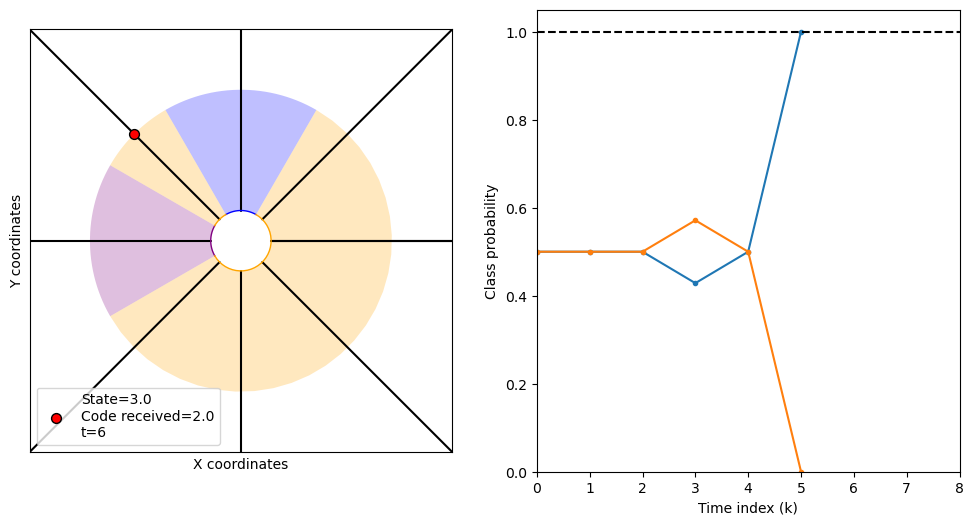

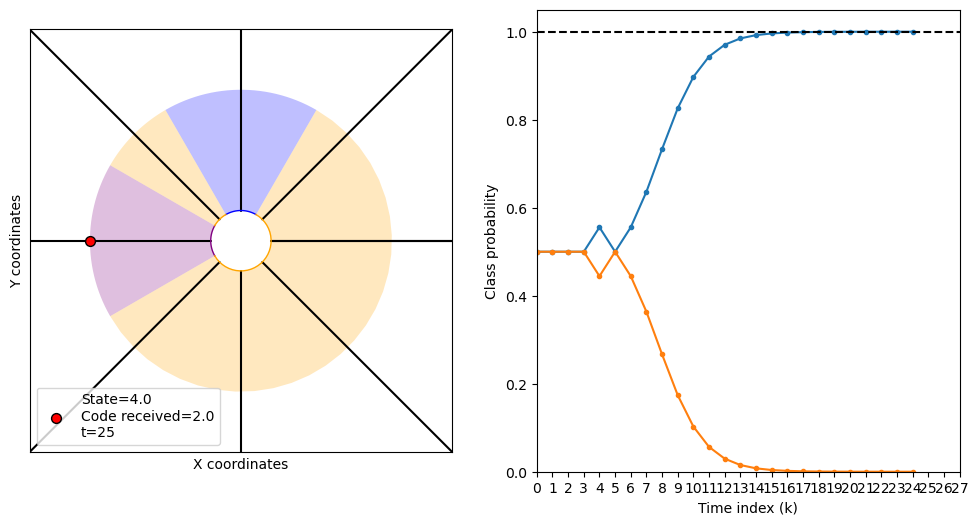

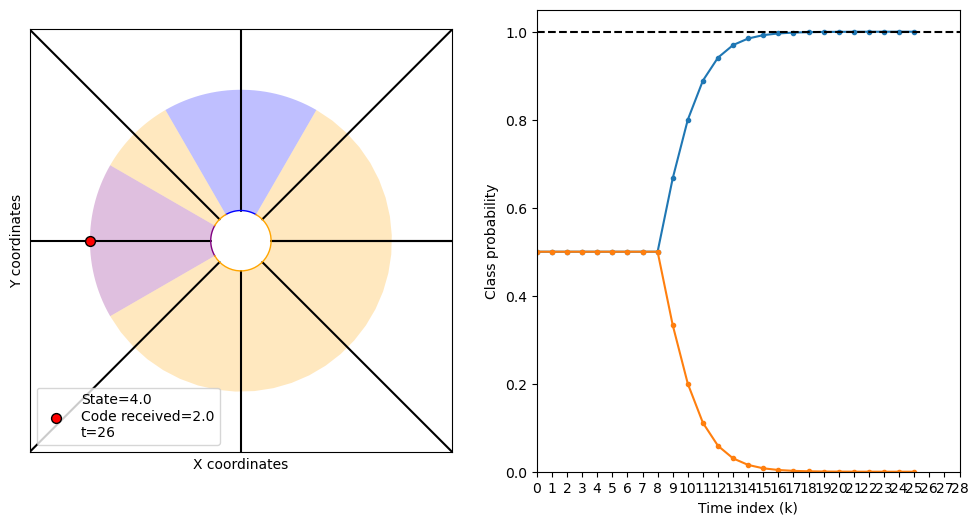

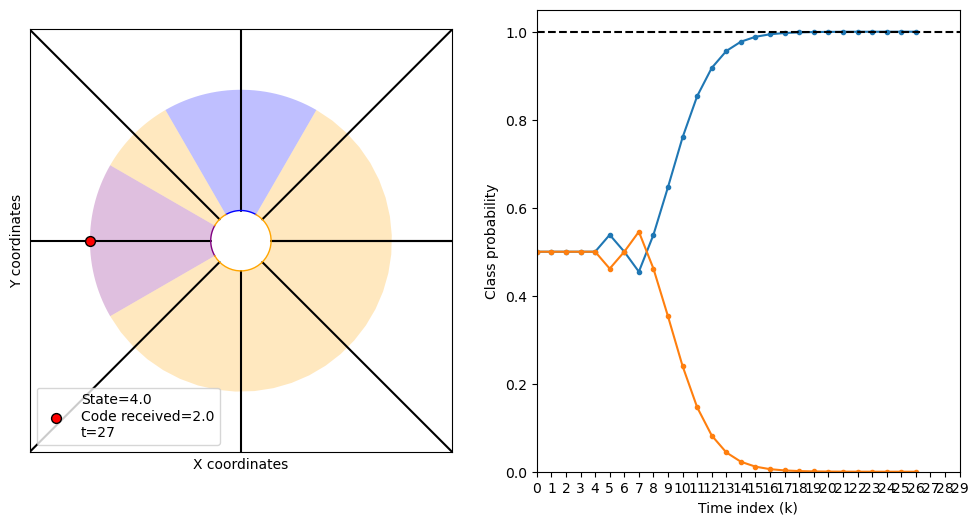

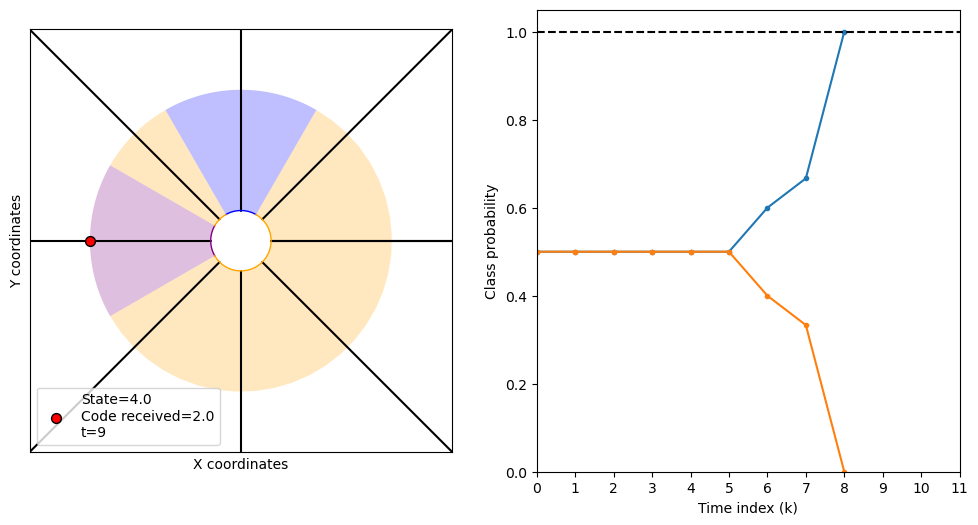

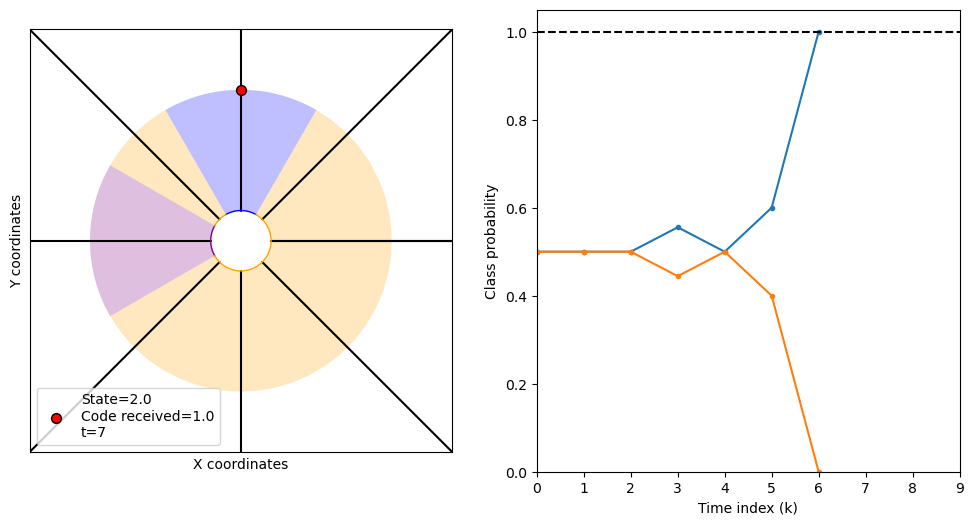

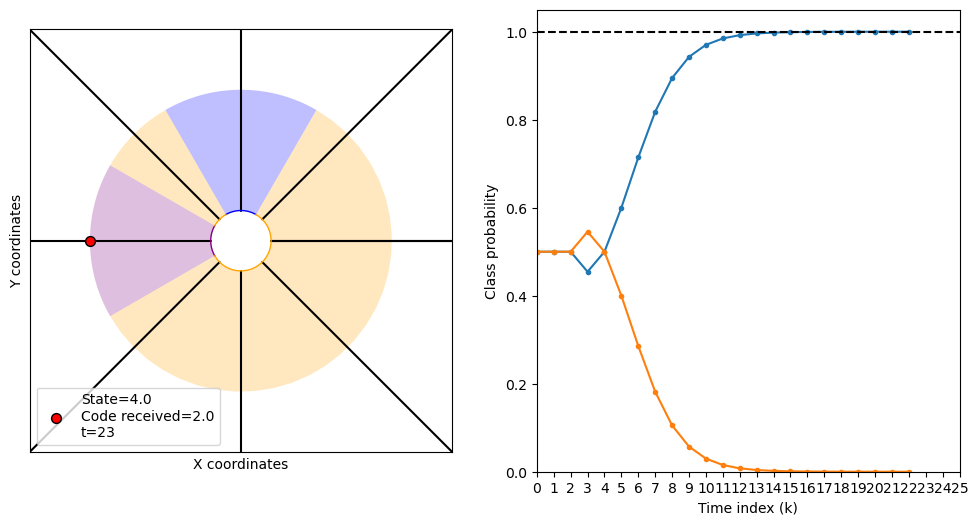

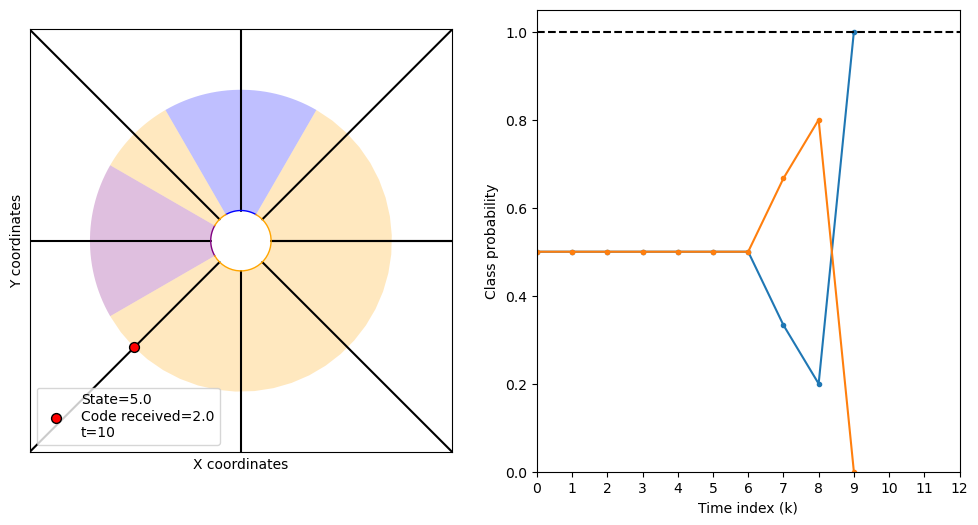

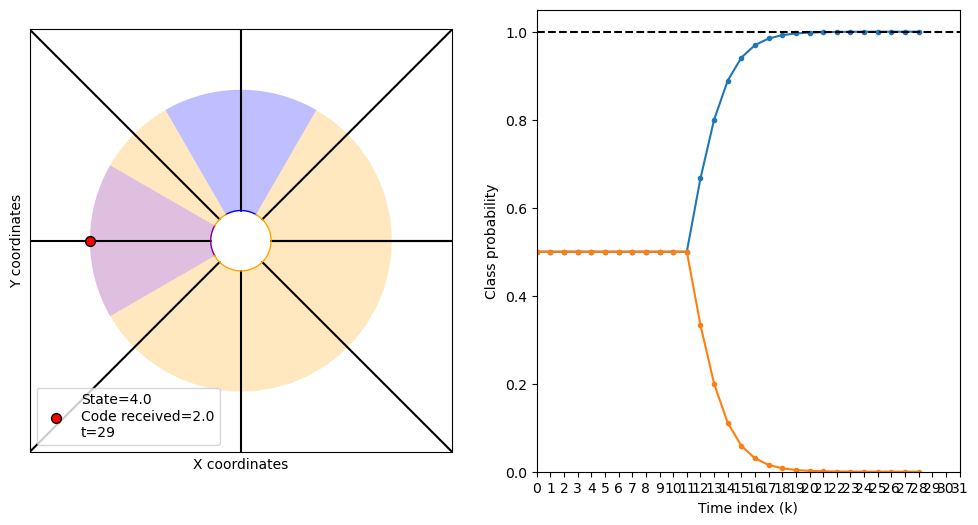

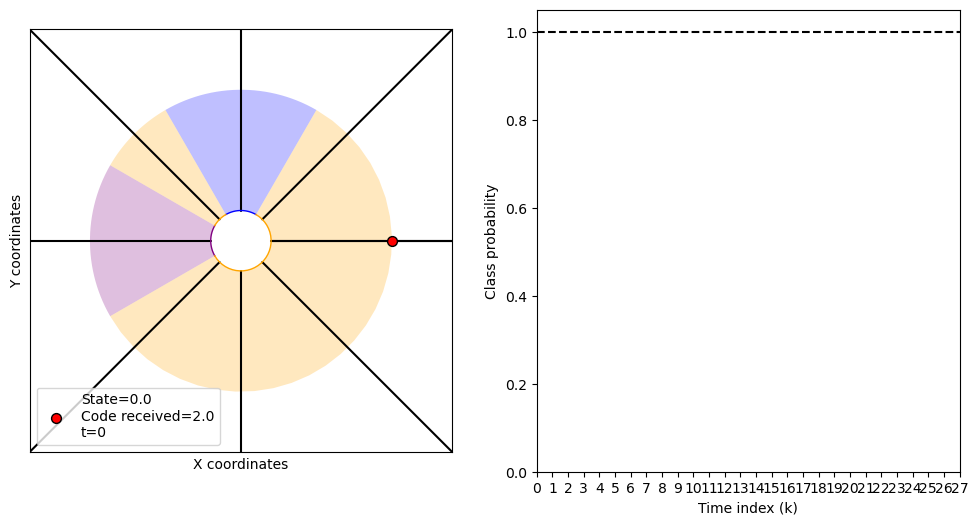

In [22]:
trial_num = 0
num_trials = 10

while trial_num < num_trials:
    fig, ax = plt.subplots(1, 2, figsize=(12,6))
    def update(time_ind):
        ax_grid = ax[0]
        ax_diffusion = ax[1]
        ax_grid.cla()
        ax_diffusion.cla()

        radius = 1
        radius_until = 5
        pie = np.pi
        theta_obs1 = np.linspace(np.radians(obs1_bounds1[0]), np.radians(obs1_bounds1[1]), 30)
        x_inner = radius * np.cos(theta_obs1)
        y_inner =  radius * np.sin(theta_obs1)
        x_poly = np.concatenate([radius_until*x_inner, x_inner[::-1]])
        y_poly = np.concatenate([radius_until*y_inner, y_inner[::-1]])
        ax_grid.fill(x_poly, y_poly, facecolor='blue', alpha=0.25, linewidth=0)
        ax_grid.plot(x_inner, y_inner, color='blue', linewidth=1)

        theta_obs1 = np.linspace(np.radians(obs1_bounds2[0]), np.radians(obs1_bounds2[1]), 30)
        x_inner = radius * np.cos(theta_obs1)
        y_inner =  radius * np.sin(theta_obs1)
        x_poly = np.concatenate([radius_until*x_inner, x_inner[::-1]])
        y_poly = np.concatenate([radius_until*y_inner, y_inner[::-1]])
        ax_grid.fill(x_poly, y_poly, facecolor='purple', alpha=0.25, linewidth=0)
        ax_grid.plot(x_inner, y_inner, color='purple', linewidth=1)

        theta_obs0 = np.linspace(np.radians(obs1_bounds1[1]), np.radians(obs1_bounds2[0]), 30)
        x_inner = radius * np.cos(theta_obs0)
        y_inner =  radius * np.sin(theta_obs0)
        x_poly = np.concatenate([radius_until*x_inner, x_inner[::-1]])
        y_poly = np.concatenate([radius_until*y_inner, y_inner[::-1]])
        ax_grid.fill(x_poly, y_poly, facecolor='orange', alpha=0.25, linewidth=0)
        ax_grid.plot(x_inner, y_inner, color='orange', linewidth=1)

        theta_obs0 = np.linspace(np.radians(obs1_bounds2[1]), np.radians(obs1_bounds1[0])+2*pie, 30)
        x_inner = radius * np.cos(theta_obs0)
        y_inner =  radius * np.sin(theta_obs0)
        x_poly = np.concatenate([radius_until*x_inner, x_inner[::-1]])
        y_poly = np.concatenate([radius_until*y_inner, y_inner[::-1]])
        ax_grid.fill(x_poly, y_poly, facecolor='orange', alpha=0.25, linewidth=0)
        ax_grid.plot(x_inner, y_inner, color='orange', linewidth=1)

        for theta in STATE_CENTERS:
            r_outer = 4 * radius_until * radius
            ax_grid.plot([radius*np.cos(theta), r_outer*np.cos(theta)], 
                    [radius*np.sin(theta), r_outer*np.sin(theta)],
                        color='k', linewidth=1.5, solid_capstyle='round', zorder=1)
            
        current_angle = (angles_visited_across_trials[min(trial_num, num_trials-1), time_ind]%360)
        code_received = codes_received_across_trials[min(trial_num, num_trials-1), time_ind]
        initial_radians = np.radians(current_angle)
        initial_state = np.floor((initial_radians) / STATE_STEP)
        ax_grid.scatter(radius_until*radius*np.cos(initial_radians), radius_until*radius*np.sin(initial_radians),
                s=200, marker='.', facecolor='r', edgecolor='k', zorder=4, label=f'State={initial_state}\nCode received={code_received}\nt={time_ind}')
        
        ax_grid.set_aspect('equal', adjustable='box')
        ax_grid.set_xticks([])
        ax_grid.set_yticks([])
        ax_grid.set_ylabel('Y coordinates')
        ax_grid.set_xlabel('X coordinates')
        GRID_EXTENT = 7
        ax_grid.set_xlim(-GRID_EXTENT, GRID_EXTENT)
        ax_grid.set_ylim(-GRID_EXTENT, GRID_EXTENT)
        ax_grid.legend()

        for i in range(NUM_BELIEFS):
            if i == 0:
                class_name = 'target'
            else:
                class_name = 'non-target'
            ax_diffusion.plot(posterior_across_trials[min(trial_num, num_trials-1), :time_ind][:,i], marker='.', label=f'Class {class_name}')
        # ax_diffusion.plot(expected_forecast_t_across_trials[min(trial_num, num_trials-1), :time_ind], marker='.')
        ax_diffusion.axhline(y=1.0, linestyle='dashed', color='k')
        ax_diffusion.set_xlim(0, time_taken_per_trial[min(trial_num, num_trials-1)]+1)
        ax_diffusion.set_ylim(0.0, 1.05)
        ax_diffusion.set_xticks(np.arange(time_taken_per_trial[min(trial_num, num_trials-1)]+2).astype(int))
        ax_diffusion.set_ylabel('Class probability')
        ax_diffusion.set_xlabel('Time index (k)')

    ani = animation.FuncAnimation(fig=fig, func=update, frames=int(time_taken_per_trial[min(trial_num, num_trials-1)]), interval=1200)
    ani.save(save_folder / f'trial_{min(trial_num, num_trials-1)}.gif')
    trial_num +=1